<a href="https://colab.research.google.com/github/xyt556/Geo_Programme/blob/main/02_creating_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 概述

Pandas 允许你读取结构化的数据集，并使用 `plot()` 方法进行可视化。默认情况下，Pandas 使用 `matplotlib` 来创建图表。

在本笔记本中，我们将使用伦敦犯罪公开数据集进行操作。

## 设置与数据下载

以下代码块将安装所需的包，并将数据集下载到你的 Colab 环境中。

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [ ]:
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

我们有 12 个不同的 CSV 文件，包含 2020 年每个月的犯罪数据。我们将每个文件下载到数据文件夹中。

In [ ]:
files = [
  '2020-01-metropolitan-street.csv',
  '2020-02-metropolitan-street.csv',
  '2020-03-metropolitan-street.csv',
  '2020-04-metropolitan-street.csv',
  '2020-05-metropolitan-street.csv',
  '2020-06-metropolitan-street.csv',
  '2020-07-metropolitan-street.csv',
  '2020-08-metropolitan-street.csv',
  '2020-09-metropolitan-street.csv',
  '2020-10-metropolitan-street.csv',
  '2020-11-metropolitan-street.csv',
  '2020-12-metropolitan-street.csv'
]

data_url = 'https://github.com/xyt556/python-dataviz-web/raw/main/data/crime/'

for f in files:
  url = os.path.join(data_url + f)
  download(url)


Downloaded data/2020-01-metropolitan-street.csv
Downloaded data/2020-02-metropolitan-street.csv
Downloaded data/2020-03-metropolitan-street.csv
Downloaded data/2020-04-metropolitan-street.csv
Downloaded data/2020-05-metropolitan-street.csv
Downloaded data/2020-06-metropolitan-street.csv
Downloaded data/2020-07-metropolitan-street.csv
Downloaded data/2020-08-metropolitan-street.csv
Downloaded data/2020-09-metropolitan-street.csv
Downloaded data/2020-10-metropolitan-street.csv
Downloaded data/2020-11-metropolitan-street.csv
Downloaded data/2020-12-metropolitan-street.csv


## 数据预处理

将所有 12 个 CSV 文件合并为一个单一的 DataFrame 会很有帮助。我们可以使用 `pd.concat()` 来合并多个 DataFrame 的列表。

In [ ]:
dataframe_list = []

for f in files:
    filepath = os.path.join(data_folder, f)
    df = pd.read_csv(filepath)
    dataframe_list.append(df)

merged_df = pd.concat(dataframe_list)

合并后的 DataFrame 包含了 2020 年在伦敦记录的超过 100 万条各种犯罪记录。

In [ ]:
merged_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,24c2b43c34c7cd6ef847d69fbb042c9c730b1eebe95c52...,2020-01,Metropolitan Police Service,Metropolitan Police Service,-0.539301,50.817200,On or near Highdown Drive,E01031469,Arun 009F,Other theft,Status update unavailable,NaN
1,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
2,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
3,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
4,NaN,2020-01,Metropolitan Police Service,Metropolitan Police Service,0.137065,51.583672,On or near Police Station,E01000027,Barking and Dagenham 001A,Anti-social behaviour,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
87931,05780af1c8515c41499ef396a33fc4e5c248533cecd9c4...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Violence and sexual offences,Investigation complete; no suspect identified,NaN
87932,54ce60d717f01752c5ff44f870e07a503e3fbeaae0b91e...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
87933,580fdc2edfe26a09392ab6b9128732ba0c7cd05695387a...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Offender given a caution,NaN
87934,2730906a962972bed3589463c9be9dbb8ee8e594b779a3...,2020-12,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN


## 创建饼状图

让我们创建一个饼图，显示不同类型犯罪的分布。Pandas 的 `groupby()` 函数允许我们计算分组统计数据。

(1) Pandas GroupBy: Group, Summarize, and Aggregate Data in Python. https://datagy.io/pandas-groupby/.
(2) How to calculate summary statistics — pandas 2.2.2 documentation. https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html.
(3) pandas: Grouping data with groupby() | note.nkmk.me - nkmk note. https://note.nkmk.me/en/python-pandas-groupby-statistics/.
(4) How to Get the Average of a Groupby with Pandas. https://saturncloud.io/blog/how-to-get-the-average-of-a-groupby-with-pandas/.
(5) How to Calculate the Mean by Group in Pandas (With Examples) - Statology. https://www.statology.org/pandas-mean-by-group/.
(6) undefined. https://raw.githubusercontent.com/datagy/data/main/sales.csv.

In [ ]:
type_counts = merged_df.groupby('Crime type').size()
type_counts

,0
Crime type,
Anti-social behaviour,415105
Bicycle theft,23517
Burglary,61044
Criminal damage and arson,50923
Drugs,51629
Other crime,10066
Other theft,81924
Possession of weapons,5763
Public order,53458


让我们创建一个饼状图，显示不同类型犯罪的分布情况。Pandas 的 `groupby()` 函数可以帮助我们计算分组统计数据。

参考: [`pandas.DataFrame.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

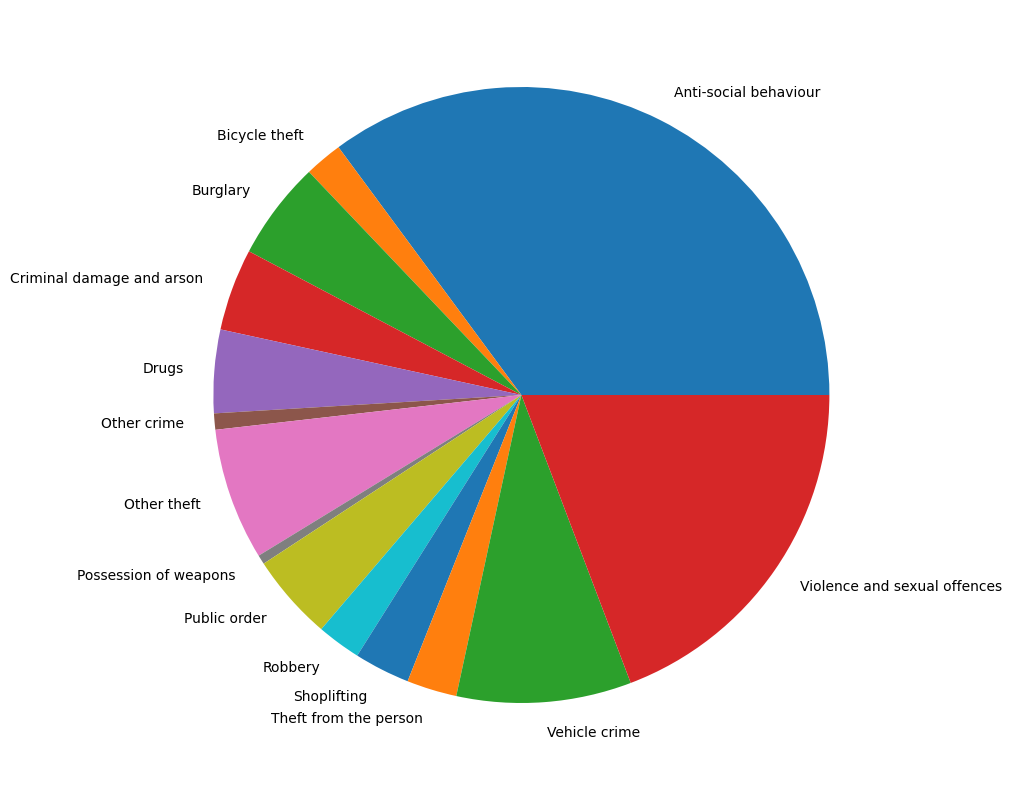

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
type_counts.plot(kind='pie', ax=ax)
plt.show()

让我们自定义图表。首先，我们使用 `set_title()` 方法为图表添加标题，并使用 `set_ylabel()` 移除空的 y 轴标签。最后，我们使用 `plt.tight_layout()` 移除图表周围的多余空白。

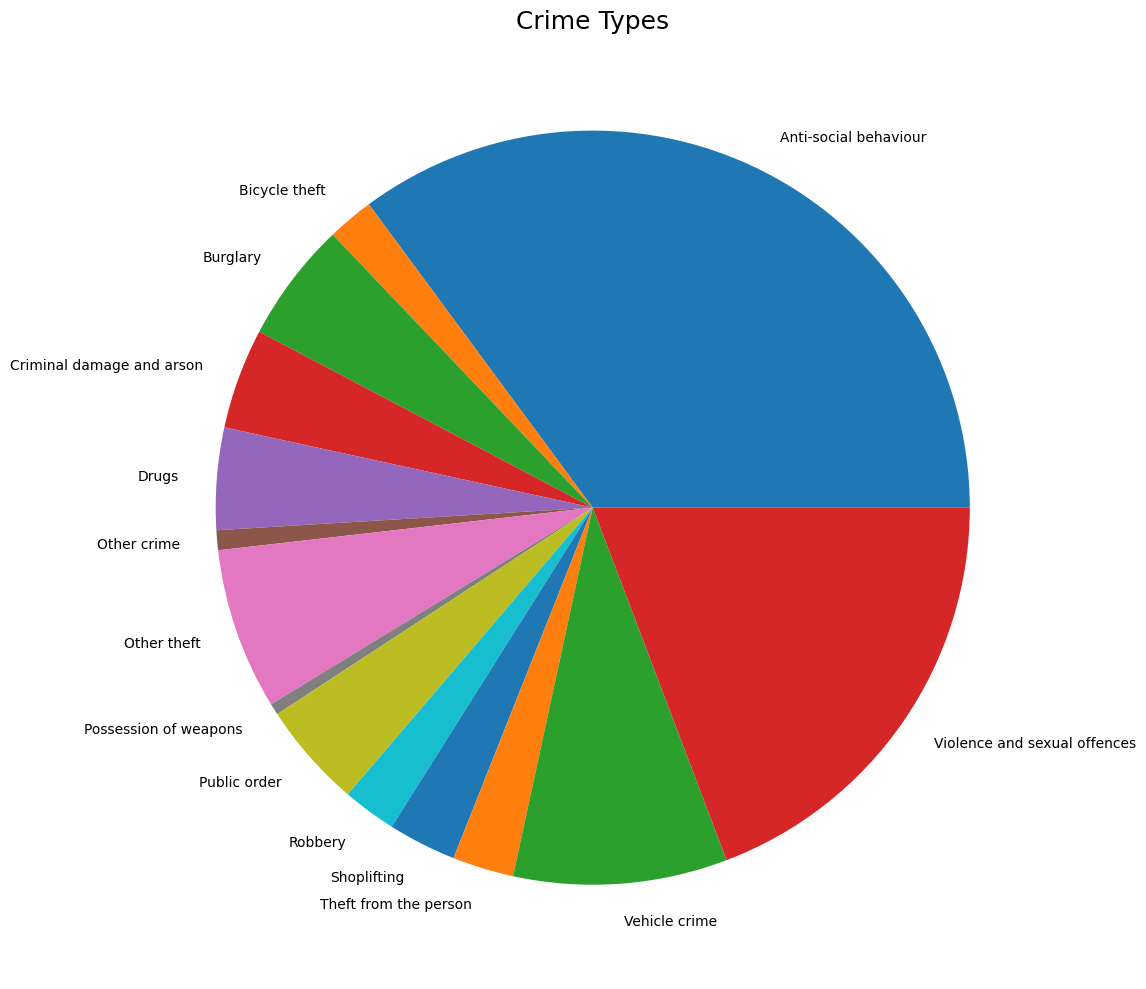

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax)

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Matplotlib 图表提供了无限的可能性来自定义你的图表。让我们看看一些可用于自定义饼图的选项。

* `wedgeprops`：自定义饼图中每个“楔形”的外观。
* `textprops`：设置标签文本的属性。

参考：[matplotlib.pyplot.pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

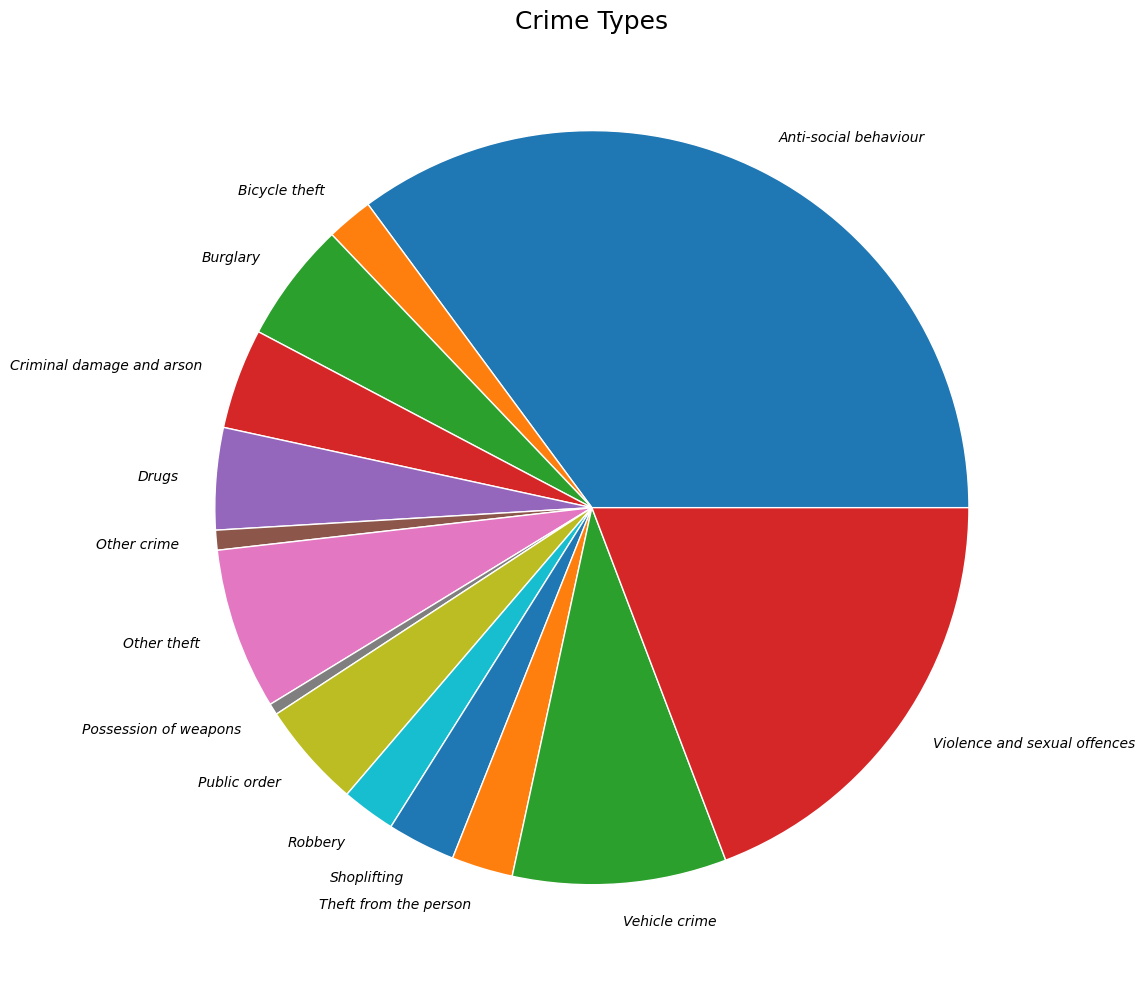

In [ ]:
wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
textprops= {'fontsize': 10, 'fontstyle': 'italic'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)

type_counts.plot(kind='pie', ax=ax,
                 wedgeprops=wedgeprops,
                 textprops=textprops
                 )

ax.set_title('Crime Types', fontsize = 18)
ax.set_ylabel('')

plt.tight_layout()
plt.show()


## 创建柱状图

我们还可以绘制全年犯罪趋势的图表。为此，让我们按月份对数据进行分组。

In [ ]:
monthly_counts = merged_df.groupby('Month').size()
monthly_counts

,0
Month,
2020-01,90979
2020-02,86984
2020-03,87409
2020-04,109951
2020-05,114008
2020-06,100198
2020-07,103657
2020-08,104782
2020-09,99633


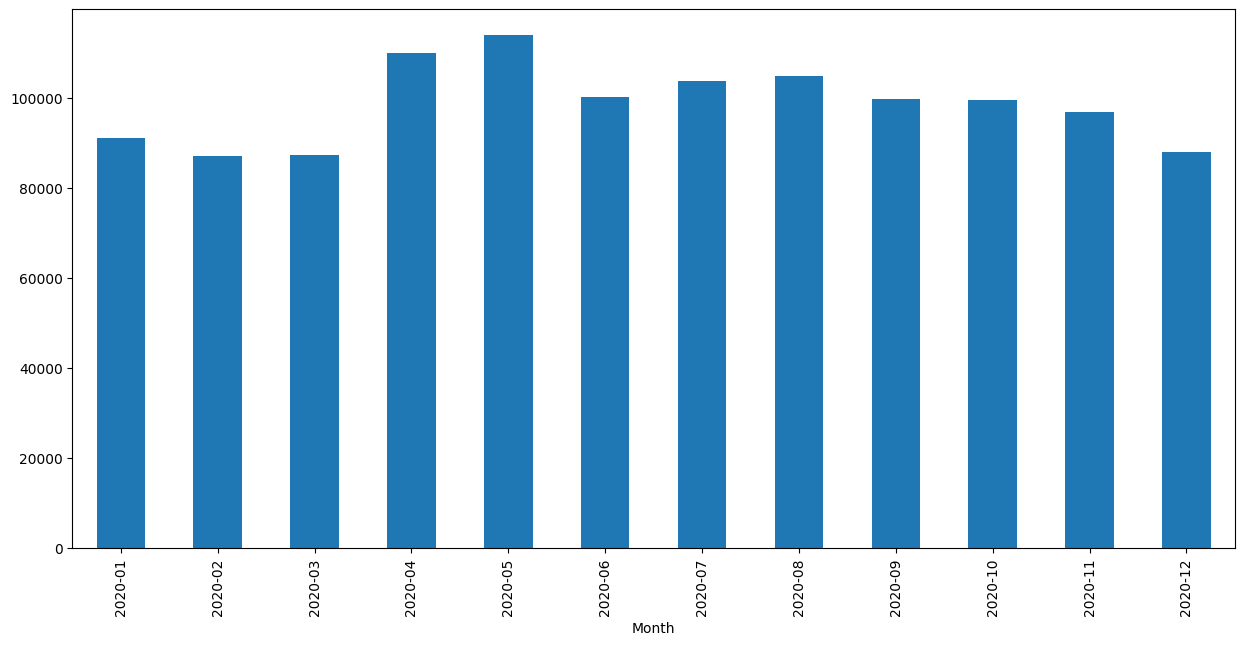

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts.plot(kind='bar', ax=ax)
plt.show()

正如我们之前学习的那样，我们可以在同一个坐标轴上添加多个图表。我们可以在柱状图中添加折线图来显示趋势线。最后，我们添加标题和轴标签来完成图表。

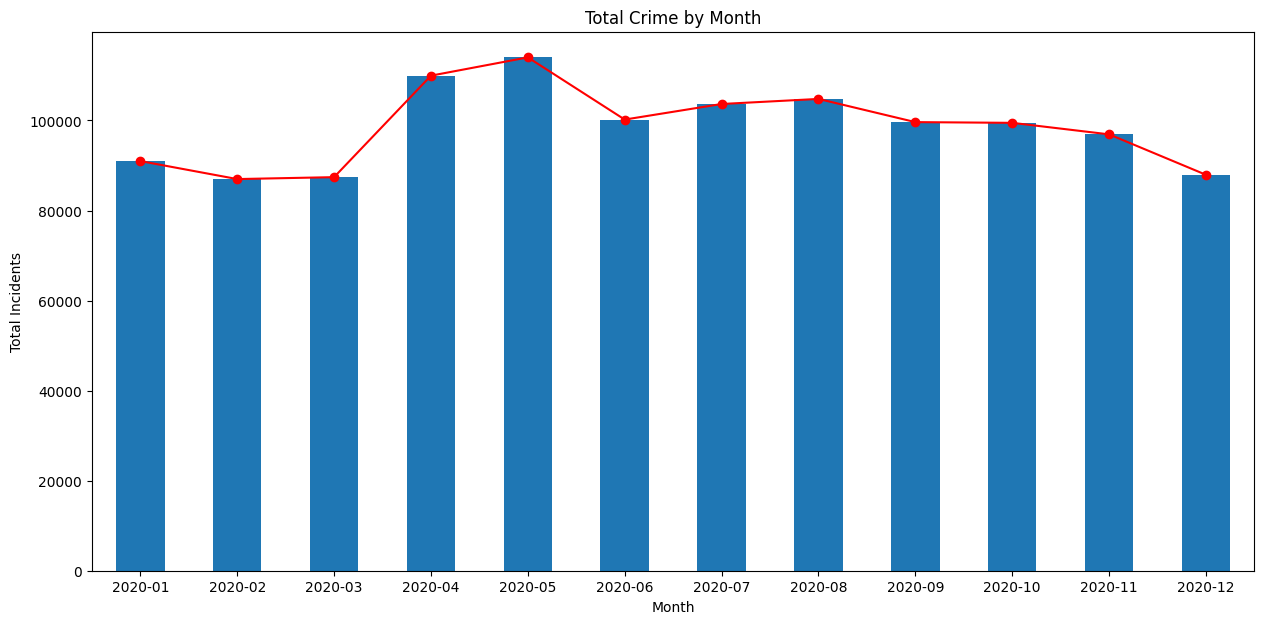

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_counts.plot(kind='bar', ax=ax)
monthly_counts.plot(kind='line', ax=ax, color='red', marker='o')

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()

## 练习

绘制自行车盗窃趋势的折线图。下面的单元格过滤 `merged_df` 数据框以选择“自行车盗窃”事件。按月份对结果进行分组并绘制结果

In [ ]:
bicycle_thefts = merged_df[merged_df['Crime type'] == 'Bicycle theft']

In [ ]:
monthly_counts1 = bicycle_thefts.groupby('Month').size()
monthly_counts1

,0
Month,
2020-01,1172
2020-02,1044
2020-03,1078
2020-04,1060
2020-05,1768
2020-06,2548
2020-07,2833
2020-08,3019
2020-09,3078


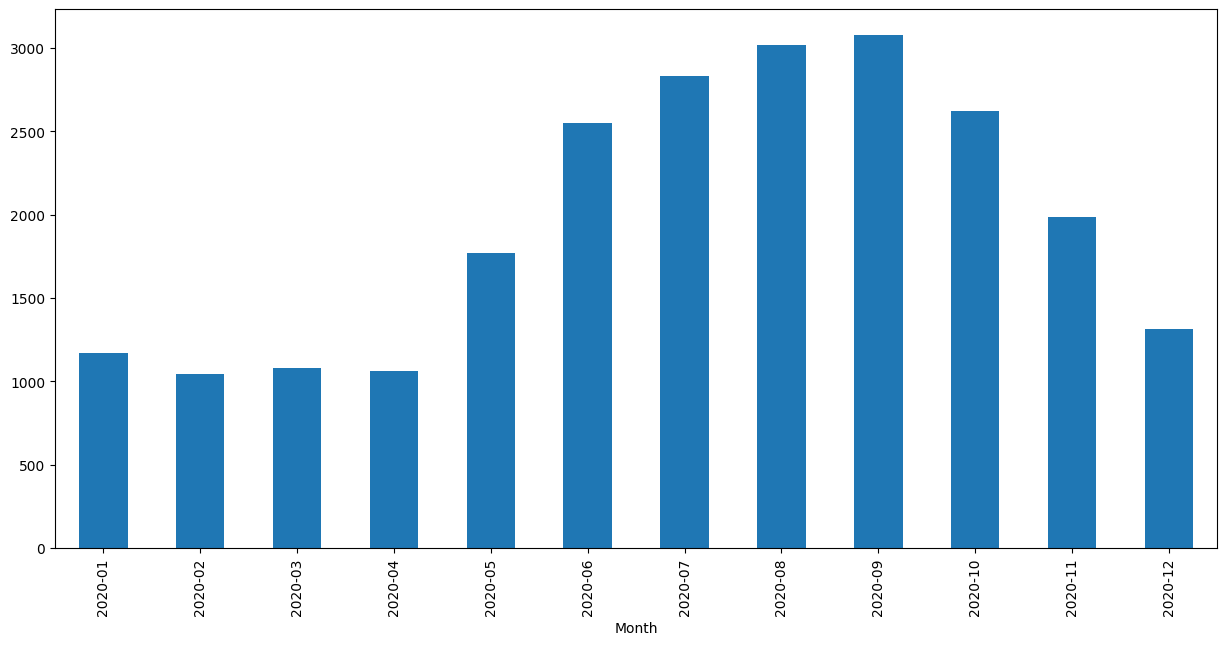

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
monthly_counts1.plot(kind='bar', ax=ax)
plt.show()

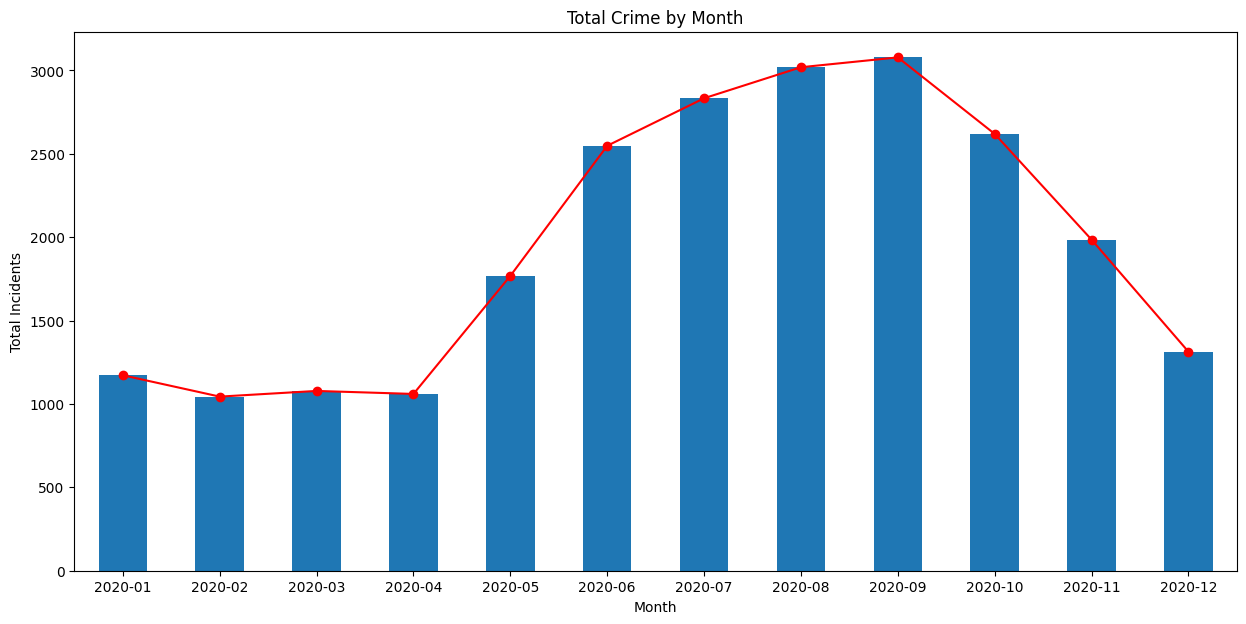

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)

monthly_counts1.plot(kind='bar', ax=ax)
monthly_counts1.plot(kind='line', ax=ax, color='red', marker='o')

ax.set_title('Total Crime by Month')
ax.set_ylabel('Total Incidents')

plt.show()